In [1]:
pip install tensorflow pandas numpy matplotlib scikit-learn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import LabelEncoder

In [3]:
pip show tensorflow


Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\Users\THARUKA\anaconda3\envs\Research_Project_env\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:

# Load the data from the CSV file
data_transient_nd  = pd.read_csv('LO_NL_Transient_P2.csv')
data_nd = pd.read_csv('LO_NL_ND_P2.csv')
data_gasket_transient = pd.read_csv('LO_GL_Transient_P2.csv')
data_gasket_nd = pd.read_csv('LO_GL_ND_P2.csv')
data_crack_transient = pd.read_csv('LO_CC_Transient_P2.csv')
data_crack_nd = pd.read_csv('LO_CC_ND_P2.csv')


no_leak_data = pd.concat([data_transient_nd, data_nd])
no_leak_data['Category'] = 'No Leak'


gasket_leak_data = pd.concat([data_gasket_transient, data_gasket_nd])
gasket_leak_data['Category'] = 'Gasket Leak'


circumferential_crack_data = pd.concat([data_crack_transient, data_crack_nd])
circumferential_crack_data['Category'] = 'Circumferential Crack'


combined_data = pd.concat([no_leak_data, gasket_leak_data, circumferential_crack_data])


label_encoder = LabelEncoder()
combined_data['Category'] = label_encoder.fit_transform(combined_data['Category'])

X = combined_data[['Sample', 'Value']].values  # Features: Sample and Value
y = combined_data['Category'].values


print("Encoded Categories:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Encoded Categories:
{'Circumferential Crack': 0, 'Gasket Leak': 1, 'No Leak': 2}


In [6]:
num_rows = combined_data.shape[0]
print(f"Number of rows: {num_rows}")

Number of rows: 5495686


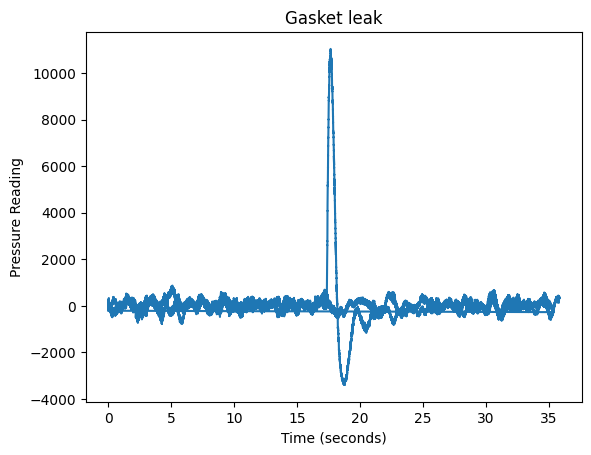

In [4]:

plt.plot(gasket_leak_data['Sample'], gasket_leak_data['Value'])
plt.title('Gasket leak')
plt.xlabel('Time (seconds)')
plt.ylabel('Pressure Reading')
plt.show()

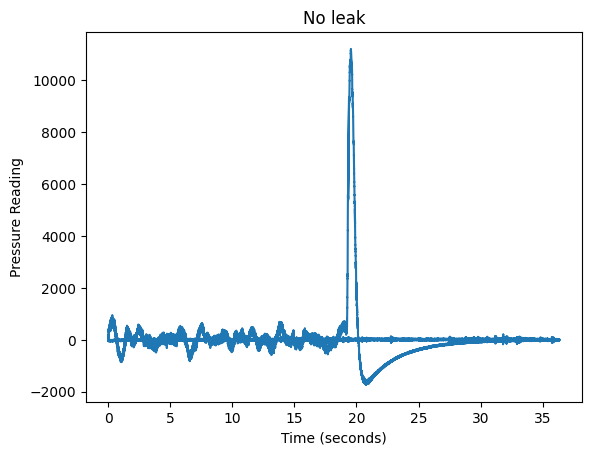

In [3]:

plt.plot(no_leak_data['Sample'], no_leak_data['Value'])
plt.title('No leak')
plt.xlabel('Time (seconds)')
plt.ylabel('Pressure Reading')
plt.show()

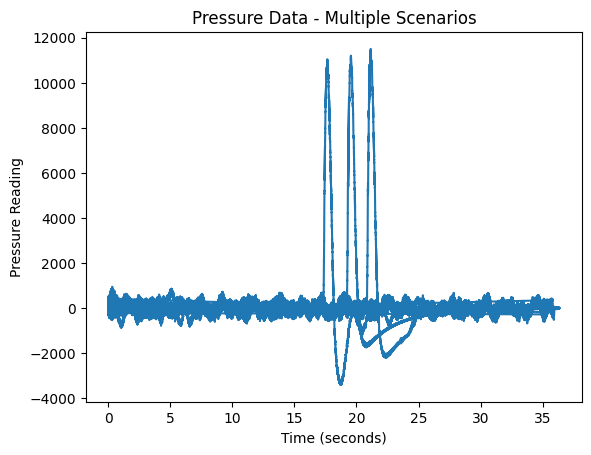

In [ ]:

plt.plot(combined_data['Sample'], combined_data['Value'])
plt.title('Pressure Data - Multiple Scenarios')
plt.xlabel('Time (seconds)')
plt.ylabel('Pressure Reading')
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:

print(X_train[:50])  


[[   28.03          -6.99351171]
 [   20.24910156     8.12876776]
 [   23.84269531 -1351.744236  ]
 [   23.0309375   -298.4410798 ]
 [   11.58519531    58.99461691]
 [   29.60015625  -335.8020056 ]
 [   21.61644531    28.50745455]
 [   30.15183594   206.8209639 ]
 [   34.51410156   275.2351266 ]
 [   30.47738281   508.1344041 ]
 [   30.24535156   407.1305161 ]
 [   29.97273438   -86.72916713]
 [   26.81375       39.8289472 ]
 [   18.43988281   -87.69958079]
 [   29.7959375    -70.79820961]
 [   23.453125    -153.3642382 ]
 [    4.47496094   321.2489075 ]
 [    9.92277344   -16.29330925]
 [   16.01550781   124.2549353 ]
 [   19.75855469   -41.3623287 ]
 [   10.19132813    92.31215244]
 [   29.79832031  -418.3680341 ]
 [   26.46824219  -310.5712505 ]
 [   22.98398438  -786.8017523 ]
 [    8.32027344  -137.7567519 ]
 [   35.59410156   147.7065987 ]
 [   28.19015625    96.67901389]
 [   19.91617188  -407.6934839 ]
 [    7.57613281     8.61397459]
 [   17.75476563  -295.1254998 ]
 [   34.37

In [9]:
window_size = 50

In [10]:
from tensorflow.keras.layers import GlobalMaxPooling1D

# Define the LSTM model for multiclass classification with added layers
model = Sequential()
model.add(LSTM(64, input_shape=(window_size, 1), return_sequences=True))
model.add(LSTM(32, return_sequences=True))  # Additional LSTM layer with return_sequences=True
model.add(LSTM(16, activation='sigmoid', return_sequences=True))  # LSTM with sigmoid activation
model.add(GlobalMaxPooling1D())  # Global max pooling layer
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Multiclass classification

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary to confirm the new architecture
model.summary()


c:\Users\THARUKA\anaconda3\envs\Research_Project_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50, 16)         │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 16)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,771 (128.01 KB)

 Trainable params: 32,771 (128.01 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [13]:
history = model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/8
137393/137393 ━━━━━━━━━━━━━━━━━━━━ 436s 3ms/step - accuracy: 0.5876 - loss: 0.8375 - val_accuracy: 0.6263 - val_loss: 0.7805
Epoch 2/8
137393/137393 ━━━━━━━━━━━━━━━━━━━━ 427s 3ms/step - accuracy: 0.6579 - loss: 0.7191 - val_accuracy: 0.6730 - val_loss: 0.6931
Epoch 3/8
137393/137393 ━━━━━━━━━━━━━━━━━━━━ 429s 3ms/step - accuracy: 0.6730 - loss: 0.6920 - val_accuracy: 0.6833 - val_loss: 0.6732
Epoch 4/8
137393/137393 ━━━━━━━━━━━━━━━━━━━━ 424s 3ms/step - accuracy: 0.6814 - loss: 0.6781 - val_accuracy: 0.6921 - val_loss: 0.6609
Epoch 5/8
137393/137393 ━━━━━━━━━━━━━━━━━━━━ 423s 3ms/step - accuracy: 0.6885 - loss: 0.6663 - val_accuracy: 0.6904 - val_loss: 0.6575
Epoch 6/8
137393/137393 ━━━━━━━━━━━━━━━━━━━━ 428s 3ms/step - accuracy: 0.6931 - loss: 0.6572 - val_accuracy: 0.6964 - val_loss: 0.6493
Epoch 7/8
137393/137393 ━━━━━━━━━━━━━━━━━━━━ 431s 3ms/step - accuracy: 0.6960 - loss: 0.6510 - val_accuracy: 0.6944 - val_loss: 0.6553
Epoch 8/8
137393/137393 ━━━━━━━━━━━━━━━━━━━━ 429s 3ms/s

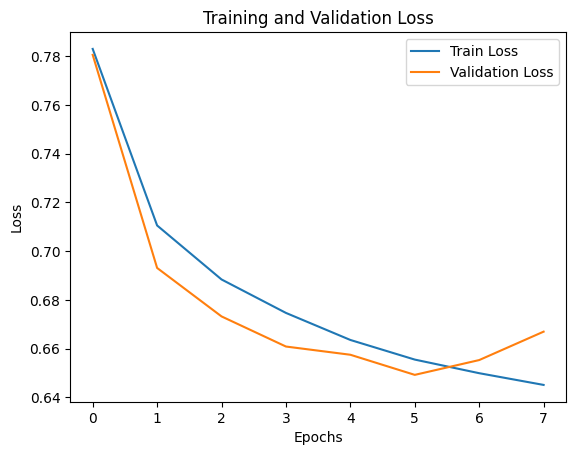

In [14]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [15]:
predictions = model.predict(X_test)


34349/34349 ━━━━━━━━━━━━━━━━━━━━ 91s 3ms/step


In [18]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


34349/34349 ━━━━━━━━━━━━━━━━━━━━ 46s 1ms/step - accuracy: 0.6995 - loss: 0.6457
Test Accuracy: 69.99%


In [17]:
# Number of splits and epochs per split
num_splits = 4
epochs_per_split = 2

# Split the training data into 4 parts
X_train_splits = np.array_split(X_train, num_splits)
y_train_splits = np.array_split(y_train, num_splits)

# Loop through each split and train the model on that split for 2 epochs
for i in range(num_splits):
    print(f"Training on split {i + 1}/{num_splits}")
    model.fit(
        X_train_splits[i],
        y_train_splits[i],
        epochs=epochs_per_split,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=1
    )


Training on split 1/4
Epoch 1/2
34349/34349 ━━━━━━━━━━━━━━━━━━━━ 145s 4ms/step - accuracy: 0.7010 - loss: 0.6414 - val_accuracy: 0.6993 - val_loss: 0.6450
Epoch 2/2
34349/34349 ━━━━━━━━━━━━━━━━━━━━ 143s 4ms/step - accuracy: 0.7008 - loss: 0.6414 - val_accuracy: 0.6969 - val_loss: 0.6470
Training on split 2/4
Epoch 1/2
34349/34349 ━━━━━━━━━━━━━━━━━━━━ 143s 4ms/step - accuracy: 0.6997 - loss: 0.6429 - val_accuracy: 0.7027 - val_loss: 0.6356
Epoch 2/2
34349/34349 ━━━━━━━━━━━━━━━━━━━━ 144s 4ms/step - accuracy: 0.7004 - loss: 0.6407 - val_accuracy: 0.7023 - val_loss: 0.6355
Training on split 3/4
Epoch 1/2
34349/34349 ━━━━━━━━━━━━━━━━━━━━ 142s 4ms/step - accuracy: 0.7013 - loss: 0.6396 - val_accuracy: 0.7039 - val_loss: 0.6359
Epoch 2/2
34349/34349 ━━━━━━━━━━━━━━━━━━━━ 142s 4ms/step - accuracy: 0.7026 - loss: 0.6383 - val_accuracy: 0.7026 - val_loss: 0.6366
Training on split 4/4
Epoch 1/2
34349/34349 ━━━━━━━━━━━━━━━━━━━━ 142s 4ms/step - accuracy: 0.7031 - loss: 0.6365 - val_accuracy: 0.7081 

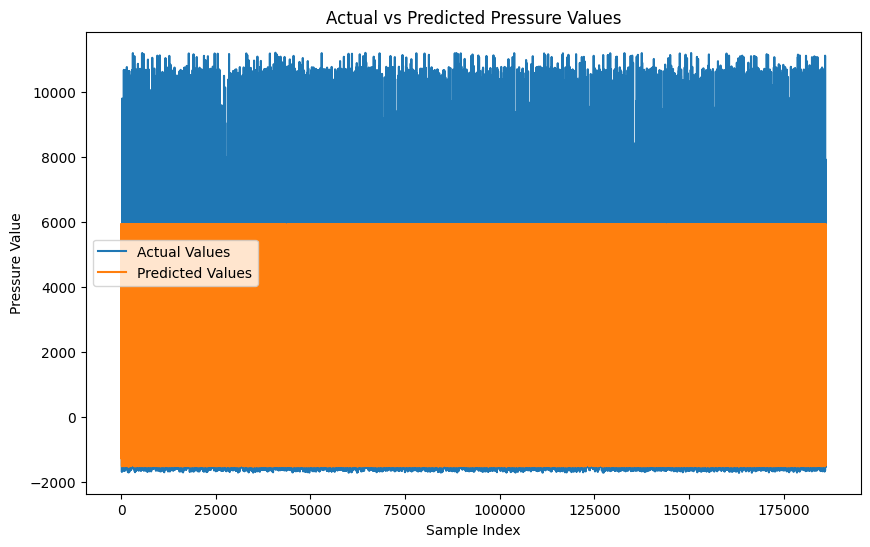

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Actual vs Predicted Pressure Values')
plt.xlabel('Sample Index')
plt.ylabel('Pressure Value')
plt.legend()
plt.show()


In [19]:
model.save("model.h5")


In [20]:
model.save("model.keras")


In [21]:
pip install flask

  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.0.4
    Uninstalling Werkzeug-3.0.4:
      Successfully uninstalled Werkzeug-3.0.4
Note: you may need to restart the kernel to use updated packages.
